# KNOWING THE VEHICLE MARKET USING WEB SCRAPING

![](https://www.edureka.co/blog/wp-content/uploads/2018/11/Untitled-1.jpg)
<div style="text-align: right;">
    <a href="https://www.edureka.co/blog/web-scraping-with-python/"> IMAGE SOURCE </a>
</div>


In this project I am going to extract information from a website and then analyze it using different Python libraries. In particular, I am going to extract information about Nissan Versa vehicles from the [mercadolibre](https://carros.mercadolibre.com.co/nissan/nissan-versa_Desde_0_NoIndex_True) website, however this Python code is designed for extracting information about any vehicle brand and reference. The purpose of this project is to getting familiar with the vehicular market, particularly in Colombia.This will be the process that we are going to follow:

1. Download the page using [requests](https://docs.python-requests.org/en/master/)
2. Extracting the information for the HTML page using [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
3. Putting all together and saving the extracted information into csv files
4. Analyzing the extracted data and draw conclusions


## Downloading web page using requests
The first step of this project is to extract the HTML code of the web page using this Python library called request and save it in this Jupyter notebook.

In [1]:
# Install the library
!pip install requests --upgrade --quiet
# Import the library
import requests
# Using the URL of the page we are going to scrape
web_url = 'https://carros.mercadolibre.com.co/nissan/nissan-versa_Desde_0_NoIndex_True'
# We can download the web page by using the get function
response = requests.get(web_url)
# Checking if the requests of downloading was successful, if we get a value between 200 and 299 then we are ok.
response_status = response.status_code
if response_status != 200:
    print('Status code:', response.status_code)
    raise Exception('Failed to fetch web page ')
# Saving the html file
page_content = response.text
with open ('mercado_libre.html', 'w', encoding="utf-8") as file: 
               file.write(page_content)

Now, as you can see. The HTML code of this page is stored in this Jupyter notebook.

![title](https://imgur.com/pozXK2B.jpg)

Now, if we open the file it will look something like this:


![pic](https://imgur.com/Nf3hg76.jpg)

## Extracting information using beautiful soup
In this section we are going to extract the information we need using BeatifulSoup functions. The information we are going to extract for every car that is posted on this website is: car description, car price, car model, car year, car mileage, car location, car image and the url of the post.

In [2]:
# Install the library
!pip install beautifulsoup4 --upgrade --quiet
# Import the library
from bs4 import BeautifulSoup
# Open the html file we previously save
with open('mercado_libre.html', 'r') as f:
    html_source = f.read()
# Getting the document with beatifulsoup
doc = BeautifulSoup(html_source, 'html.parser')

In [3]:
type(doc)

bs4.BeautifulSoup

As we can see from the image above the tag for every post is underlined.

![image.png](https://imgur.com/OtQYKnJ.jpg)

In [4]:
list_item_tags = doc.find_all('li', class_='ui-search-layout__item')

In [5]:
len(list_item_tags)

48

For every page there are a maximum of 48 post. So we are getting the correct tags. Now we are going to find all the characteristics that we mention before but for only one car and then we make a loop to get the rest.

In [6]:
item_tag = list_item_tags[0]

Car price tag
![image.png](https://imgur.com/VbJFUMd.jpg)

Car year and mileage tags
![image-2.png](https://imgur.com/uAuhpLH.jpg)

Car name and url tags
![image-3.png](https://imgur.com/eZVawqw.jpg)

Car location
![image-4.png](https://imgur.com/VGnDlTX.jpg)
Car image 
![image-5.png](https://imgur.com/H1MMKJF.jpg)

In [7]:
def car_description(item_tag):
    #Find car name
    name_and_url = item_tag.find('div', role='group')
    car_name = name_and_url.find('a')['title'].strip()
    #Find car prices
    cars_prices_all_text = item_tag.find('div', class_='ui-search-price__second-line shops__price-second-line').text
    car_prices = get_the_price(cars_prices_all_text)
    #Find car year
    year_and_km = item_tag.find('div', class_='ui-search-item__group ui-search-item__group--attributes shops__items-group')
    car_year = year_and_km.find_all('li')[0].text
    #Find car mileage
    car_mileage = year_and_km.find_all('li')[1].text
    #Find car location
    cars_location_text = item_tag.find('div', class_='ui-search-item__group ui-search-item__group--location shops__items-group')
    car_location = cars_location_text.text
    #Find car image
    car_images = item_tag.find('img', fetchpriority='high')['data-src']
    #Find car url
    car_url = name_and_url.find('a')['href']
    return {
        'car_name': car_name,
        'car_price': car_prices,        
        'car_year': car_year,
        'car_mileage': car_mileage,
        'cars_location': car_location,
        'car_image': car_images,
        'car_url': car_url
    }

def get_the_price(price_text):
    """This function modifies the text of the tag and only select what is after the '$' symbol"""
    number_position = price_text.find('$')
    price = price_text[number_position:]
    return price

In [8]:
car_description(item_tag)

{'car_name': 'Nissan Versa 1.6 Advance',
 'car_price': '$38.500.000',
 'car_year': '2014',
 'car_mileage': '50.600 Km',
 'cars_location': 'Suba - Bogotá D.C.',
 'car_image': 'https://http2.mlstatic.com/D_NQ_NP_811731-MCO71194209301_082023-W.jpg',
 'car_url': 'https://carro.mercadolibre.com.co/MCO-1328390689-nissan-versa-_JM#position=1&search_layout=grid&type=item&tracking_id=d00dc9af-2a71-4da7-883e-889c40a8ff80'}

Now we make a list of dictionaries with a for loop to get all the posts on the first page. 

In [9]:
def get_cars(doc):
    list_item_tags = doc.find_all('li', class_='ui-search-layout__item')
    all_cars = [car_description(tag) for tag in list_item_tags]
    return all_cars

In [10]:
car_list = get_cars(doc)

In [11]:
car_list[:3]

[{'car_name': 'Nissan Versa 1.6 Advance',
  'car_price': '$38.500.000',
  'car_year': '2014',
  'car_mileage': '50.600 Km',
  'cars_location': 'Suba - Bogotá D.C.',
  'car_image': 'https://http2.mlstatic.com/D_NQ_NP_811731-MCO71194209301_082023-W.jpg',
  'car_url': 'https://carro.mercadolibre.com.co/MCO-1328390689-nissan-versa-_JM#position=1&search_layout=grid&type=item&tracking_id=d00dc9af-2a71-4da7-883e-889c40a8ff80'},
 {'car_name': 'Nissan Versa Advance',
  'car_price': '$35.500.000',
  'car_year': '2013',
  'car_mileage': '68.382 Km',
  'cars_location': 'Ciudad Bolívar - Bogotá D.C.',
  'car_image': 'https://http2.mlstatic.com/D_NQ_NP_632620-MCO71125535121_082023-W.jpg',
  'car_url': 'https://carro.mercadolibre.com.co/MCO-1790852544-nissan-versa-advance-2013-_JM#position=2&search_layout=grid&type=item&tracking_id=d00dc9af-2a71-4da7-883e-889c40a8ff80'},
 {'car_name': 'Nissan Versa 1.6 Advance',
  'car_price': '$50.000.000',
  'car_year': '2018',
  'car_mileage': '54.800 Km',
  'cars

In [12]:
len(car_list)

48

## Putting all together
Now, we are going to put 'car_description' function and the 'get_cars' function together and then create a new function that does all the process of getting the lists of posts but for every page of the website and finally, we create a csv file to save all the posts for every page.

In [13]:
import requests
from bs4 import BeautifulSoup

def scrape_all_pages(number_of_pages, car_reference, path=None):
    for i in range(1,number_of_pages): 
        position = car_reference.find('-')
        car_brand = car_reference[:position]
        path = str(car_reference[position:][1:])+'_car_list' + str(i) +'.csv'
        web_url = 'https://carros.mercadolibre.com.co/'+str(car_brand)+'/'+str(car_reference)+'_Desde_'+str(1+48*(i-1))+'_NoIndex_True'
        response = requests.get(web_url)
        if response.status_code != 200:
            print('Status code:', response.status_code)
            raise Exception('Failed to fetch web page ')
        doc = BeautifulSoup(response.text)
        all_listed_cars = get_cars(doc)
        write_csv(all_listed_cars, path)
        print('Top repositories for cars written to file "{}"'.format(path))


def get_cars(doc):
    list_item_tags = doc.find_all('li', class_='ui-search-layout__item')
    all_cars = [car_description(tag) for tag in list_item_tags]
    return all_cars

def car_description(item_tag):
    #Find car name
    name_and_url = item_tag.find('div', role='group')
    car_name = name_and_url.find('a')['title'].strip()
    #Find car prices
    cars_prices_all_text = item_tag.find('div', class_='ui-search-price__second-line shops__price-second-line').text
    car_prices = get_the_price(cars_prices_all_text)
    #Find car year
    year_and_km = item_tag.find('div', class_='ui-search-item__group ui-search-item__group--attributes shops__items-group')
    car_year = year_and_km.find_all('li')[0].text
    #Find car mileage
    car_mileage = year_and_km.find_all('li')[1].text
    #Find car location
    cars_location_text = item_tag.find('div', class_='ui-search-item__group ui-search-item__group--location shops__items-group')
    car_location = cars_location_text.text
    #Find car image
    car_images = item_tag.find('img', fetchpriority='high')['data-src']
    #Find car url
    car_url = name_and_url.find('a')['href']
    return {
        'car_name': car_name,
        'car_price': car_prices,        
        'car_year': car_year,
        'car_mileage': car_mileage,
        'cars_location': car_location,
        'car_image': car_images,
        'car_url': car_url
    }

def get_the_price(price_text):
    """This function modifies the text of the tag and only select what is after the '$' symbol"""
    number_position = price_text.find('$')
    price = price_text[number_position:]
    return price


def write_csv(items, path):
    """This is the fuction that converts the lists into csv files"""
    with open(path, 'w') as f:
        if len(items) == 0:
            return
        headers = list(items[0].keys())
        f.write(','.join(headers) + '\n')
        for item in items:
            values = []
            for header in headers:
                values.append(str(item.get(header, "")))
            f.write(','.join(values) + "\n")

In [14]:
scrape_all_pages(10, 'nissan-versa')

Top repositories for cars written to file "versa_car_list1.csv"
Top repositories for cars written to file "versa_car_list2.csv"
Top repositories for cars written to file "versa_car_list3.csv"
Top repositories for cars written to file "versa_car_list4.csv"
Top repositories for cars written to file "versa_car_list5.csv"
Top repositories for cars written to file "versa_car_list6.csv"
Top repositories for cars written to file "versa_car_list7.csv"
Top repositories for cars written to file "versa_car_list8.csv"
Top repositories for cars written to file "versa_car_list9.csv"


After we get all these CSVs it is convenient to save it all on a folder. We can do that with this function:

In [15]:
import os
import shutil
def store_in_folder(number_of_files, name_of_the_directory):

    # Create the directory
    output_directory = name_of_the_directory
    os.makedirs(output_directory, exist_ok=True)

    # List of existing CSV files
    csv_files = []
    for i in range(1, number_of_files):
        files = 'versa_car_list'+str(i)+'.csv'
        csv_files.append(files)

    # Move each CSV file to the 'car_list' directory
    for csv_file in csv_files:
        src_path = csv_file
        dst_path = os.path.join(output_directory, csv_file)

        if not os.path.exists(dst_path):
            shutil.move(src_path, dst_path)
            print(f"Moved '{csv_file}' to 'car_list' directory.")
        else:
            print(f"'{csv_file}' already exists in 'car_list' directory.")

In [16]:
store_in_folder(10,'nissan_versa_directory')

Moved 'versa_car_list1.csv' to 'car_list' directory.
Moved 'versa_car_list2.csv' to 'car_list' directory.
Moved 'versa_car_list3.csv' to 'car_list' directory.
Moved 'versa_car_list4.csv' to 'car_list' directory.
Moved 'versa_car_list5.csv' to 'car_list' directory.
Moved 'versa_car_list6.csv' to 'car_list' directory.
Moved 'versa_car_list7.csv' to 'car_list' directory.
Moved 'versa_car_list8.csv' to 'car_list' directory.
Moved 'versa_car_list9.csv' to 'car_list' directory.


## Analyzing extracted data and draw conclusions
Finally, we are going to convert all the CSVs files into a pandas dataframe and then we are going to analyze and clean the data, get insights and finally draw conclusions.

In [17]:
# We import pandas library to analyze tabular data
import pandas as pd

# We create a lists of pandas dataframe and then we concatenate all of them in only one dataframe
csv_directory = './nissan_versa_directory/'
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]
dataframes = []
for csv_file in csv_files:
    csv_path = os.path.join(csv_directory, csv_file)
    df = pd.read_csv(csv_path, error_bad_lines = False)
    dataframes.append(df)

nissan_versa_df = pd.concat(dataframes).reset_index(drop=True)

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 45: expected 7 fields, saw 8\n'
b'Skipping line 31: expected 7 fields, saw 8\n'
b'Skipping line 14: expected 7 fields, saw 8\n'


In [18]:
# This is our concatenated dataframe
nissan_versa_df

,car_name,car_price,car_year,car_mileage,cars_location,car_image,car_url
0,Nissan Versa 1.6 Advance,$38.500.000,2014,50.600 Km,Suba - Bogotá D.C.,https://http2.mlstatic.com/D_NQ_NP_811731-MCO7...,https://carro.mercadolibre.com.co/MCO-13283906...
1,Nissan Versa Advance,$35.500.000,2013,68.382 Km,Ciudad Bolívar - Bogotá D.C.,https://http2.mlstatic.com/D_NQ_NP_632620-MCO7...,https://carro.mercadolibre.com.co/MCO-17908525...
2,Nissan Versa 1.6 Advance,$50.000.000,2018,54.800 Km,Fontibón - Bogotá D.C.,https://http2.mlstatic.com/D_NQ_NP_811068-MCO7...,https://carro.mercadolibre.com.co/MCO-13266745...
3,Nissan Versa 1.6 Drive,$52.000.000,2019,46.000 Km,Suba - Bogotá D.C.,https://http2.mlstatic.com/D_NQ_NP_723510-MCO7...,https://carro.mercadolibre.com.co/MCO-13256340...
4,Nissan Versa 1.6 Exclusive,$86.000.000,2022,5.868 Km,Barrios Unidos - Bogotá D.C.,https://http2.mlstatic.com/D_NQ_NP_938734-MCO7...,https://carro.mercadolibre.com.co/MCO-13252463...
...,...,...,...,...,...,...,...
424,Nissan Versa 1.6 Sense,$40.000.000,2017,67.000 Km,Barranquilla - Atlántico,https://http2.mlstatic.com/D_NQ_NP_841964-MCO7...,https://carro.mercadolibre.com.co/MCO-17381616...
425,Nissan Versa Sense,$42.000.000,2018,60.000 Km,Martires - Bogotá D.C.,https://http2.mlstatic.com/D_NQ_NP_722342-MCO7...,https://carro.mercadolibre.com.co/MCO-17825317...
426,Nissan Versa Versa Exclusive,$78.000.000,2020,16.500 Km,Cali - Valle Del Cauca,https://http2.mlstatic.com/D_NQ_NP_745082-MCO7...,https://carro.mercadolibre.com.co/MCO-13207916...
427,Nissan Versa 1.6 Advance,$35.000.000,2013,77.200 Km,Kennedy - Bogotá D.C.,https://http2.mlstatic.com/D_NQ_NP_608429-MCO6...,https://carro.mercadolibre.com.co/MCO-13189500...


### Data cleaning
Before analyzing the data we are going to perform data cleaning. First, let's check some basic info about our data.

In [19]:
nissan_versa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_name       429 non-null    object
 1   car_price      429 non-null    object
 2   car_year       429 non-null    int64 
 3   car_mileage    429 non-null    object
 4   cars_location  429 non-null    object
 5   car_image      429 non-null    object
 6   car_url        429 non-null    object
dtypes: int64(1), object(6)
memory usage: 23.6+ KB


When we check the datatype(Dtype) of some variables we found that only 'car_year' column is numeric so we need to change that. Before changing the data type first let's check if we didn't get duplicated rows. We can do that with the 'car_url' column If we get 429 (the total number of rows) unique values then we do not have repeated columns

In [20]:
nissan_versa_df['car_url'].nunique()

429

Now we are going to modify the 'car_price' and 'car_mileage' columns and make them numeric. For doing that, we need to get rid of all non numeric symbols line '.' and '$'.

In [21]:
# Replacing '$' sign to blank space for the 'car_price' column
nissan_versa_df['car_price'] = nissan_versa_df['car_price'].str.replace(r'[$,]', '', regex=True)
# Replacing '.' to blank space for the 'car_price' column
nissan_versa_df['car_price'] = nissan_versa_df['car_price'].str.replace(r'.', '', regex=True)
# Replacing '.' to blank space for the 'car_mileage' column
nissan_versa_df['car_mileage'] = nissan_versa_df['car_mileage'].str.replace(r'.', '', regex=True)
# Replacing 'Km' to blank space for the 'car_mileage' column
nissan_versa_df['car_mileage'] = nissan_versa_df['car_mileage'].str.replace(r'Km', '', regex=True)

In [22]:
nissan_versa_df

,car_name,car_price,car_year,car_mileage,cars_location,car_image,car_url
0,Nissan Versa 1.6 Advance,38500000,2014,50600,Suba - Bogotá D.C.,https://http2.mlstatic.com/D_NQ_NP_811731-MCO7...,https://carro.mercadolibre.com.co/MCO-13283906...
1,Nissan Versa Advance,35500000,2013,68382,Ciudad Bolívar - Bogotá D.C.,https://http2.mlstatic.com/D_NQ_NP_632620-MCO7...,https://carro.mercadolibre.com.co/MCO-17908525...
2,Nissan Versa 1.6 Advance,50000000,2018,54800,Fontibón - Bogotá D.C.,https://http2.mlstatic.com/D_NQ_NP_811068-MCO7...,https://carro.mercadolibre.com.co/MCO-13266745...
3,Nissan Versa 1.6 Drive,52000000,2019,46000,Suba - Bogotá D.C.,https://http2.mlstatic.com/D_NQ_NP_723510-MCO7...,https://carro.mercadolibre.com.co/MCO-13256340...
4,Nissan Versa 1.6 Exclusive,86000000,2022,5868,Barrios Unidos - Bogotá D.C.,https://http2.mlstatic.com/D_NQ_NP_938734-MCO7...,https://carro.mercadolibre.com.co/MCO-13252463...
...,...,...,...,...,...,...,...
424,Nissan Versa 1.6 Sense,40000000,2017,67000,Barranquilla - Atlántico,https://http2.mlstatic.com/D_NQ_NP_841964-MCO7...,https://carro.mercadolibre.com.co/MCO-17381616...
425,Nissan Versa Sense,42000000,2018,60000,Martires - Bogotá D.C.,https://http2.mlstatic.com/D_NQ_NP_722342-MCO7...,https://carro.mercadolibre.com.co/MCO-17825317...
426,Nissan Versa Versa Exclusive,78000000,2020,16500,Cali - Valle Del Cauca,https://http2.mlstatic.com/D_NQ_NP_745082-MCO7...,https://carro.mercadolibre.com.co/MCO-13207916...
427,Nissan Versa 1.6 Advance,35000000,2013,77200,Kennedy - Bogotá D.C.,https://http2.mlstatic.com/D_NQ_NP_608429-MCO6...,https://carro.mercadolibre.com.co/MCO-13189500...


Let's make both columns numeric.

In [25]:
nissan_versa_df['car_price'] = pd.to_numeric(nissan_versa_df['car_price'])

In [26]:
nissan_versa_df['car_mileage'] = pd.to_numeric(nissan_versa_df['car_mileage'])

In [27]:
#Let's see the numeric columns statistics
nissan_versa_df.describe()

,car_price,car_year,car_mileage
count,4.290000e+02,429.000000,429.000000
mean,5.424319e+07,2018.174825,55912.361305
std,1.644226e+07,3.276897,36680.375852
min,2.290000e+07,2005.000000,120.000000
25%,4.130000e+07,2015.000000,29000.000000
50%,4.999000e+07,2019.000000,50000.000000
75%,6.800000e+07,2021.000000,77800.000000
max,1.050000e+08,2024.000000,218000.000000


In [28]:
nissan_versa_df['cars_location'].value_counts().count()

92

From the 'cars_location' we are getting too many unique values from places that are the same. So, we are going to modify that.

In [29]:
# We locate every row that contains the name of the city
bogota_location = nissan_versa_df['cars_location'].str.contains('bogot', case=False)
cali_location =  nissan_versa_df['cars_location'].str.contains('cali', case=False)
barranquilla_location = nissan_versa_df['cars_location'].str.contains('barranquilla', case=False)
medellin_location = nissan_versa_df['cars_location'].str.contains('medell', case=False)
cundinamarca_location = nissan_versa_df['cars_location'].str.contains('cundinam', case=False)
pereira_location = nissan_versa_df['cars_location'].str.contains('pereira', case=False)
cartagena_location = nissan_versa_df['cars_location'].str.contains('cartagena', case=False)
cucuta_location = nissan_versa_df['cars_location'].str.contains('cúcuta', case=False)
boyaca_location = nissan_versa_df['cars_location'].str.contains('boyaca', case=False)
bucaramanga_location = nissan_versa_df['cars_location'].str.contains('bucaramanga', case=False)

In [30]:
# We replace those rows with standardize names for every city
nissan_versa_df.at[bogota_location, 'cars_location'] = 'Bogota D.C.'
nissan_versa_df.at[cali_location, 'cars_location'] = 'Cali'
nissan_versa_df.at[barranquilla_location, 'cars_location'] = 'Barranquilla'
nissan_versa_df.at[medellin_location, 'cars_location'] = 'Medellin'
nissan_versa_df.at[cundinamarca_location, 'cars_location'] = 'Cundinamarca'
nissan_versa_df.at[pereira_location, 'cars_location'] = 'Pereira'
nissan_versa_df.at[cartagena_location, 'cars_location'] = 'Cartagena'
nissan_versa_df.at[cucuta_location, 'cars_location'] = 'Cucuta'
nissan_versa_df.at[boyaca_location, 'cars_location'] = 'Boyaca'
nissan_versa_df.at[bucaramanga_location, 'cars_location'] = 'Bucaramanga'

In [31]:
# To avoid combining antioquia rows with medellin rows we execute this code separately
antioquia_location = nissan_versa_df['cars_location'].str.contains('antioquia', case=False)
nissan_versa_df.at[antioquia_location, 'cars_location'] = 'Antioquia'

In [32]:
nissan_versa_df['cars_location'].value_counts().count()

28

In [33]:
#Let's see top 10 cities with more cars
nissan_versa_df['cars_location'].value_counts().head(10)

Bogota D.C.     188
Cali             55
Barranquilla     44
Medellin         43
Antioquia        23
Cundinamarca     19
Bucaramanga       9
Cucuta            8
Cartagena         7
Pereira           6
Name: cars_location, dtype: int64

Now that we cleaned our data, is time to analyze it.

### Analyzing data
Now is time to analyze the data and see how is the vehicular market behaving. We are going to compare the prices that are on the market with a particular vehicle that we want to put up for sale and see what would it be a fair price to sell the vehicle. The description of the vehicle is the following one: Nissan Versa Sense 1.6 2016 with 110000 km of mileage. Also we are going to set a initial guess price for the vehicle that sits around 35 to 40 millions colombian pesos (COP) and see if this price would be fair or not compared to what the data tell us.

In [34]:
!pip install pandas-profiling numpy matplotlib seaborn --quiet

In [35]:
!pip install plotly.express --quiet

In [36]:
import seaborn as sns
import numpy as np

import plotly.express as px
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import matplotlib.ticker as ticker

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')

matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

First, we will look at how many cars are for sale for their respective year. In particular we are going to look how many are for sale for 2016 models.

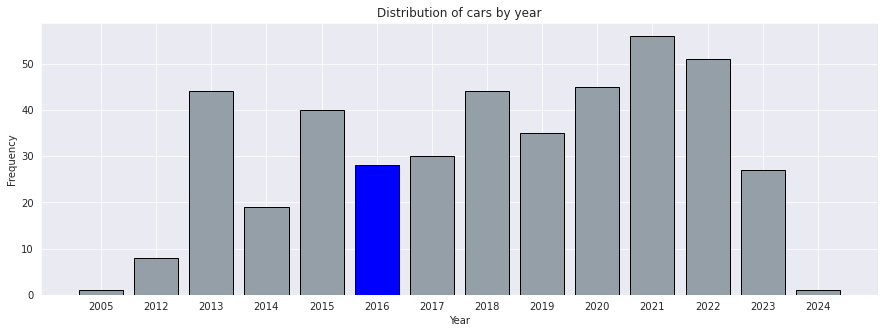

There are 28 cars for sale for 2016 and represent the 6.53% of the total of cars.


In [37]:
# We cast our 'car_year' column to string
nissan_versa_df['car_year'] = nissan_versa_df['car_year'].astype(str)
# We group our data by year
year_group = nissan_versa_df.groupby('car_year')['car_name'].count()
# We plot the data pointing out the 2016 bar
bin_colors = ['#949fa8']
patches = plt.bar(year_group.index, year_group, color=bin_colors, edgecolor='black')
patches[5].set_fc("blue")

plt.title('Distribution of cars by year')
plt.xlabel('Year')
plt.ylabel('Frequency')
cars_2016 = year_group[year_group.index == '2016'].sum()
percentage_2016 = round((cars_2016/nissan_versa_df['car_year'].count())*100,2)

plt.show()
print('There are {} cars for sale for 2016 and represent the {}% of the total of cars.'.format(cars_2016, percentage_2016))

Now, we are going to plot a histogram to see the cars mileage distribution. In particular we are going to look for cars in the 100k to 110k range.

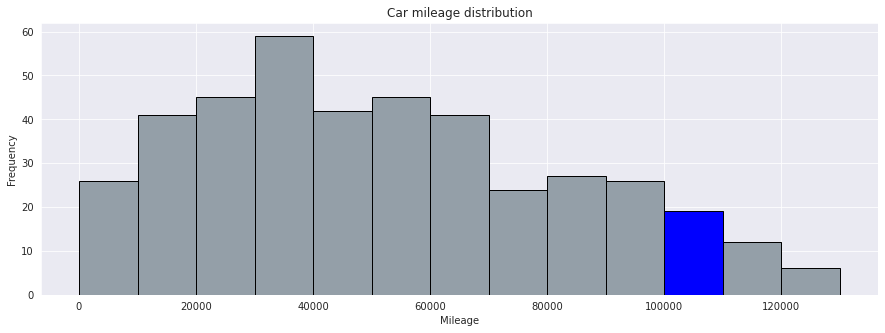

There are 20 cars for sale for mileage between 100000 and 110000 kilometers and represents the 4.66% of the total of cars


In [38]:
# Creating a histogram for the car mileage distribution but highlighting cars in the 100k to 110k range.
car_mileage = nissan_versa_df['car_mileage']
bin_range = list(range(0, 140000, 10000))

bin_colors = ['#949fa8']

n, bins, patches = plt.hist(car_mileage, bins=bin_range, color=bin_colors, edgecolor='black')
patches[10].set_fc("blue")

plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Car mileage distribution')
mileage_filter = car_mileage[(car_mileage > 99999) & (car_mileage < 110001)].count()
percentage_mileage = round(mileage_filter/car_mileage.count()*100,2)

plt.show()
print('There are {} cars for sale for mileage between 100000 and 110000 kilometers and represents the {}% of the total of cars'.format(mileage_filter, percentage_mileage))

Now we are going to make a histogram to see the distribution of car prices that are for sale. Particularly we are going to point out cars with values around 35 and 40 millions COP.

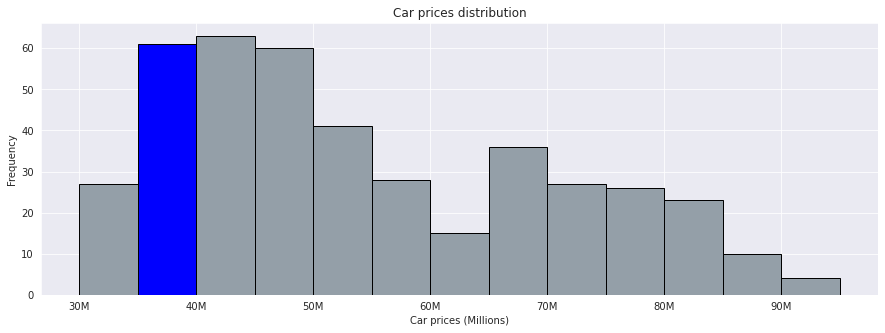

There are 69 cars with prices between 35 and 40 millions and represents the 16.08% of the total of cars.


In [39]:
# Plotting a histogram for the car prices
car_price = nissan_versa_df['car_price']
bin_range = list(range(30000000, 100000000, 5000000))
bin_colors = ['#949fa8']

fig, ax = plt.subplots()

# Create a histogram
n, bins, patches = ax.hist(car_price, bin_range, color=bin_colors ,edgecolor='black')
patches[1].set_fc("blue")

# Define a custom formatting function
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

# Create a FuncFormatter object
formatter = ticker.FuncFormatter(millions_formatter)

# Apply the formatter to the x-axis tick labels
ax.xaxis.set_major_formatter(formatter)

ax.set_xlabel('Car prices (Millions)')
ax.set_ylabel('Frequency')
ax.set_title('Car prices distribution')
car_price_filter = car_price[(car_price > 34999999) & (car_price < 40000001)].count()
percentage_price = round(car_price_filter/car_price.count()*100,2)

plt.show()
print('There are {} cars with prices between 35 and 40 millions and represents the {}% of the total of cars.'.format(car_price_filter, percentage_price))

Now, let's see how many cars are for each city. In particular we are going to point out cars from Barranquilla.

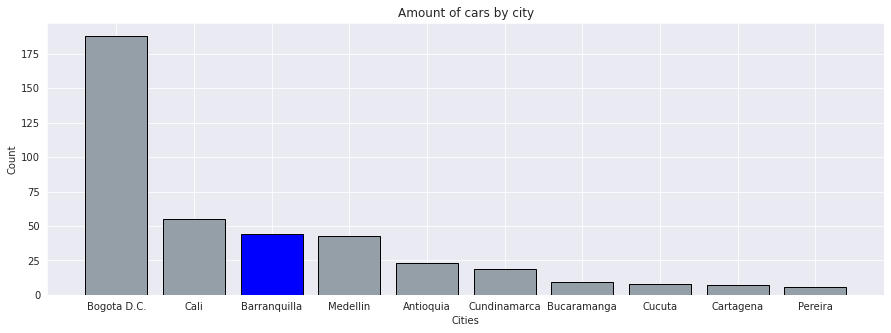

There are 44 cars in the city of Barranquilla and represents the 10.26% of the total of cars


In [50]:
# Create the dataframe grouping by cities, only top 10 cities
cities_df = nissan_versa_df.groupby('cars_location')['car_name'].count().sort_values(ascending = False).head(10)
# Create the visualization pointing out 'Barranquilla'
bin_colors = ['#949fa8']
patches = plt.bar(cities_df.index, cities_df, color= bin_colors, edgecolor='black')
patches[2].set_fc("blue")

plt.title('Amount of cars by city')
plt.xlabel('Cities')
plt.ylabel('Count')
cars_barranquilla = cities_df[cities_df.index == 'Barranquilla'].sum()
percentage_city = round(cars_barranquilla/nissan_versa_df['cars_location'].count()*100,2)

plt.show()
print('There are {} cars in the city of Barranquilla and represents the {}% of the total of cars'.format(cars_barranquilla, percentage_city))

Now, we are going to create a new column to classify the cars by their type. Then we create a visualization to see how many 'Sense' cars are for sale in the market.

In [41]:
nissan_versa_df['car_type'] = nissan_versa_df.apply(lambda row: 'Sense' if 'sense' in row['car_name'].lower() 
                                                           else ('Drive' if 'drive' in row['car_name'].lower()
                                                                 else ('Advance' if 'advance' in row['car_name'].lower()
                                                                       else ('Exclusive' if 'exclusive' in row['car_name'].lower()
                                                                           else 'Other'))), axis=1)

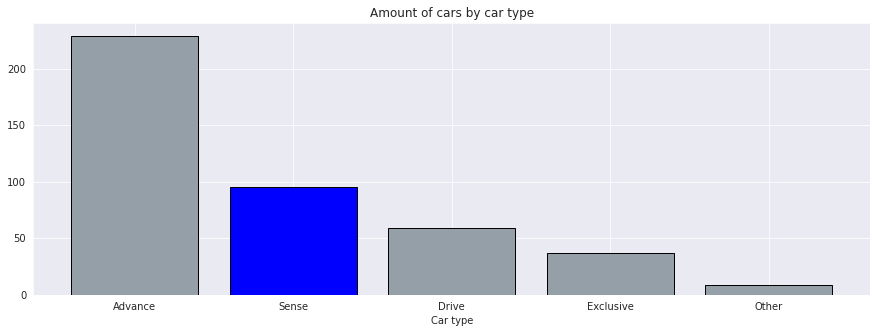

There are 95 cars for the "Sense" version and represents the 22.14% of the total of cars


In [42]:
# Create the dataframe grouping by car type
car_type_group = nissan_versa_df.groupby('car_type')['car_name'].count().sort_values(ascending = False)
# Create the visualization
bin_colors = ['#949fa8']
patches = plt.bar(car_type_group.index, car_type_group, color= bin_colors, edgecolor='black')
patches[1].set_fc("blue")

plt.title('Amount of cars by car type')
plt.xlabel('Car type')
car_type_sense = car_type_group[car_type_group.index == 'Sense'].sum()
percentage_type = round(car_type_sense/nissan_versa_df['car_type'].count()*100,2)

plt.show()
print('There are {} cars for the "Sense" version and represents the {}% of the total of cars'.format(car_type_sense, percentage_type))

Now, we are going to create a scatterplot to see the relationship between the car price and the car mileage. We are going to put special markers for the 2016 versions.

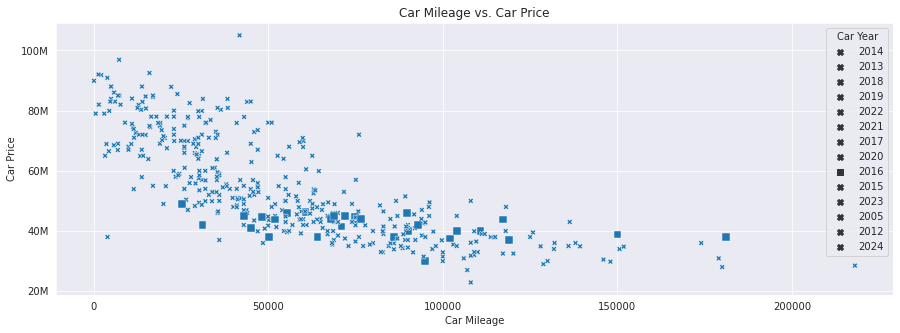

In [43]:
# Scatterplot for the relationship between car price and mileage
marker_sizes = {
    "2005": 30, "2012": 30, "2013": 30, "2014": 30, "2015": 30,
    "2016": 60,
    "2017": 30, "2018": 30, "2019": 30, "2020": 30,
    "2021": 30, "2022": 30, "2023": 30, "2024": 30
}
markers = {
    "2005": "X", "2012": "X", "2013": "X", "2014": "X", "2015": "X",
    "2016": "s", "2017": "X", "2018": "X", "2019": "X", "2020": "X",
    "2021": "X", "2022": "X", "2023": "X", "2024": "X"
}

fig, ax = plt.subplots()

sns.scatterplot(x=nissan_versa_df.car_mileage, 
                y=nissan_versa_df.car_price, 
                style=nissan_versa_df.car_year, 
                markers=markers, 
                s=nissan_versa_df.car_year.map(marker_sizes))

# Apply the formatter to the y-axis tick labels
ax.yaxis.set_major_formatter(formatter)

plt.xlabel('Car Mileage')
plt.ylabel('Car Price')
plt.title('Car Mileage vs. Car Price')
plt.legend(title='Car Year')
plt.grid(True)
plt.show()

We can see from the scatter plot above is that the relationship between mileage and price is inversely proportional. The 2016 version follows this trend but with a less steep slope.

Finally we are going to analyze the 2016 version and check how many are available on the market.

In [44]:
versa_2016 = nissan_versa_df[nissan_versa_df['car_year'] == '2016']

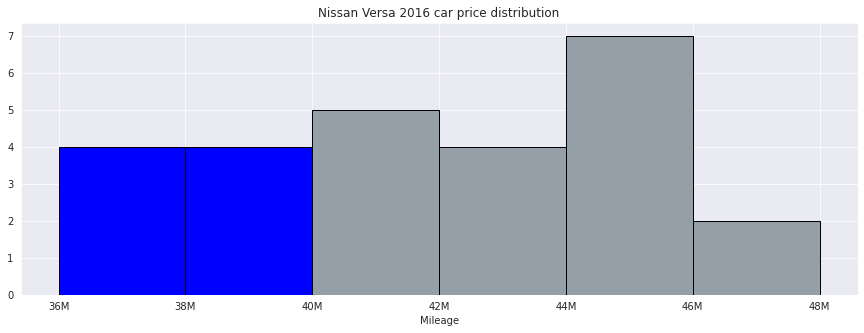

In [45]:
# Create a histogram for car prices for nissan versa 2016 version
price_versa_2016 = versa_2016['car_price']
bin_range = list(range(36000000, 50000000, 2000000))

bin_colors = ['#949fa8']

fig, ax = plt.subplots()

n, bins, patches = plt.hist(price_versa_2016, bin_range, color=bin_colors, edgecolor='black')
patches[0].set_fc("blue")
patches[1].set_fc("blue")

# Apply the formatter to the x-axis tick labels
ax.xaxis.set_major_formatter(formatter)

plt.xlabel('Mileage')
plt.title('Nissan Versa 2016 car price distribution')

plt.show()

There are 7 nissan versa 2016 cars in the price range of 36M to 40M. Also it is important to point out that cars in the range of 40M to 42M and 44M to 46M are more frequent.

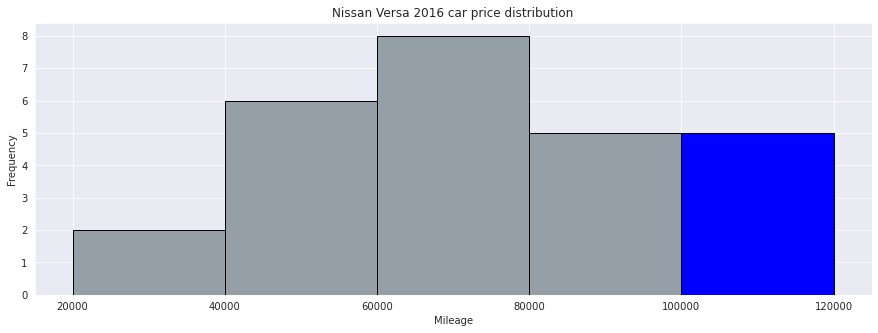

In [46]:
# Create a histogram for car prices for nissan versa 2016 version
mileage_versa_2016 = versa_2016['car_mileage']
bin_range = list(range(20000, 140000, 20000))

bin_colors = ['#949fa8']

n, bins, patches = plt.hist(mileage_versa_2016, bin_range, color=bin_colors, edgecolor='black')
patches[4].set_fc("blue")

plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Nissan Versa 2016 car price distribution')

plt.show()

There are 5 nissan versa 2016 in the mileage range of 100k to 120k km. Also we can see that cars with 40k to 60k and 60k to 80k of mileage are more frequent. Now let's see how many Nissan Versa model Sense 2016 are in the market.

In [47]:
# Show all the width
pd.set_option('display.max_colwidth', None)

In [48]:
nissan_sense_2016 = versa_2016[(versa_2016['car_mileage'] > 100000) & (versa_2016['car_type'] == 'Sense')]
nissan_sense_2016

,car_name,car_price,car_year,car_mileage,cars_location,car_image,car_url,car_type
249,Nissan Versa 1.6 Sense,37000000,2016,119000,Barranquilla,https://http2.mlstatic.com/D_NQ_NP_719306-MCO70326221132_072023-W.jpg,https://carro.mercadolibre.com.co/MCO-1311892465-nissan-versa-sense-_JM#position=12&search_layout=grid&type=item&tracking_id=83e43214-a8b1-47bf-816c-f355517a7b03,Sense
283,Nissan Versa 1.6 Sense,37500000,2016,102000,Bogota D.C.,https://http2.mlstatic.com/D_NQ_NP_821731-MCO71003725990_082023-W.jpg,https://carro.mercadolibre.com.co/MCO-1325281145-nissan-versa-2016-16-sense-_JM#position=47&search_layout=grid&type=item&tracking_id=83e43214-a8b1-47bf-816c-f355517a7b03,Sense
301,Nissan Versa 1.6 Sense,43800000,2016,117340,Pereira,https://http2.mlstatic.com/D_NQ_NP_826461-MCO71123710667_082023-W.jpg,https://carro.mercadolibre.com.co/MCO-1327008655-nissan-versa-2016-16-sense-_JM#position=17&search_layout=grid&type=item&tracking_id=bff38614-39fd-4658-9305-fb1c85573601,Sense
406,Nissan Versa 1.6 Sense,38000000,2016,181000,Antioquia,https://http2.mlstatic.com/D_NQ_NP_709134-MCO70175985685_062023-W.jpg,https://carro.mercadolibre.com.co/MCO-1743017930-nissan-versa-2016-16-sense-_JM#position=26&search_layout=grid&type=item&tracking_id=869a1c15-fd59-402f-90b4-2407e628da29,Sense


In [49]:
avg_2016_price = nissan_sense_2016['car_price'].mean()
print('The average price for the nissan versa sense 2016 is {}'.format(avg_2016_price))

The average price for the nissan versa sense 2016 is 39075000.0


### Conclusions
* After reviewing the data we can see that the estimated price that we set for our vehicle at the beginning is fair and it is located in the 35M to 40M range that we previously set.
* Cars from 2016 do not represent the majority of the market but they still have several copies on the market.
* The car's market or at least nissan versa market is concentrated in the city of Bogotá but Barranquilla is still a solid place.
* The 'Sense' model does not represent the majority of the market but still have a pretty solid percentage of the total cars for sale.
* Cars with more than 100000 km of mileage are less present on the market and maybe it would be an inconvenient when we put our car for sale.


### References
[1] https://jovian.com/aakashns/python-web-scraping-and-rest-api

[2] https://www.crummy.com/software/BeautifulSoup/bs4/doc/

[3] https://requests.readthedocs.io/en/latest/

[4] https://listado.mercadolibre.com.co/nissan-versa#D[A:nissan%20versa]